# Life Expectancy and GDP

In this project we will analyze data from the World Health Organization, to see if there's a correlation between a country's life expectancy and its GDP.

We will use different analysis techniques to see if we can find any interesting insights.

## Questions to answer
1. Is there a correlation between a country's life expectancy and its GDP?
2. What country has the highest gdp?
3. Which countries has had the biggest improvements in life expectancy?
4. Which countries has had the biggest improvements in GDP?
5. What is the average life expectancy in the different countries?

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
health_data = pd.read_csv('all_data.csv')

health_data.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploratory plots

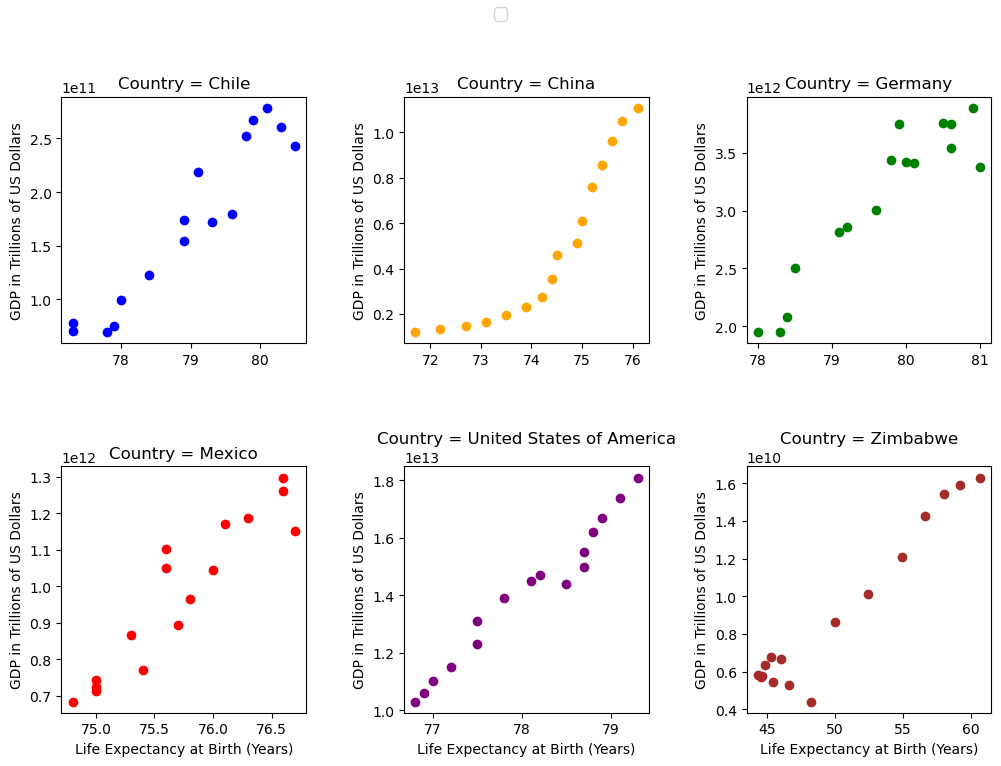

In [4]:
# subplot
fig, (ax1, ax2) = plt.subplots(2,3)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
fig.set_size_inches(12, 8)

# Create a legend that will be shared across all subplots

ax1[0].set_ylabel('GDP in Trillions of US Dollars')
ax2[0].set_ylabel('GDP in Trillions of US Dollars')

for i in range(3):
    ax2[i].set_xlabel('Life Expectancy at Birth (Years)')

fig.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'], loc='upper center', ncol=3, fontsize=12)

def create_subplot(country, ax, color='blue'):
    life_expectancy = health_data[health_data.Country == country]['Life expectancy at birth (years)']
    gdp = health_data[health_data.Country == country]['GDP']
    ax.scatter(life_expectancy, gdp, color=color)
    ax.set_ylabel('GDP in Trillions of US Dollars')
    ax.set_title('Country = ' + country)

# Create subplots
create_subplot('Chile', ax1[0])
create_subplot('China', ax1[1], color='Orange')
create_subplot('Germany', ax1[2], color='Green')
create_subplot('Mexico', ax2[0], color='Red')
create_subplot('United States of America', ax2[1], color='Purple')
create_subplot('Zimbabwe', ax2[2], color='Brown')



In The above plot, we're looking at the relationship between a country's life expectancy and its GDP. We can see that there's a positive correlation between the two variables. Whenever there's an increase in GDP we can see that there's also an increase in life expectancy and there's almost a linear relationship between the two variables. Although its not a perfect linear relationship, we can see that there's a positive correlation between the two variables.

### Bar plots for exploring data

In [5]:
# Get the mean GDP for each country
dfMeans = health_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


<AxesSubplot: xlabel='Life expectancy at birth (years)', ylabel='Country'>

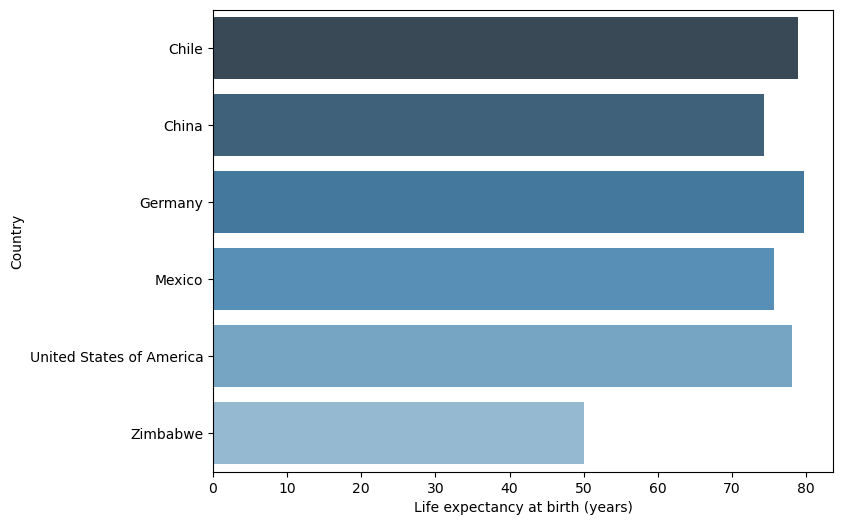

In [6]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=dfMeans, palette="Blues_d")

In the above plot we can see that more developed countries have a higher life expectancy at birth, than less developed countries. Germanys life expectancy is almost 30 years higher than Zimbabwe's. Almost all of the developed countries life expectancy is above 70 years and they're all very close to each other.

<AxesSubplot: xlabel='GDP', ylabel='Country'>

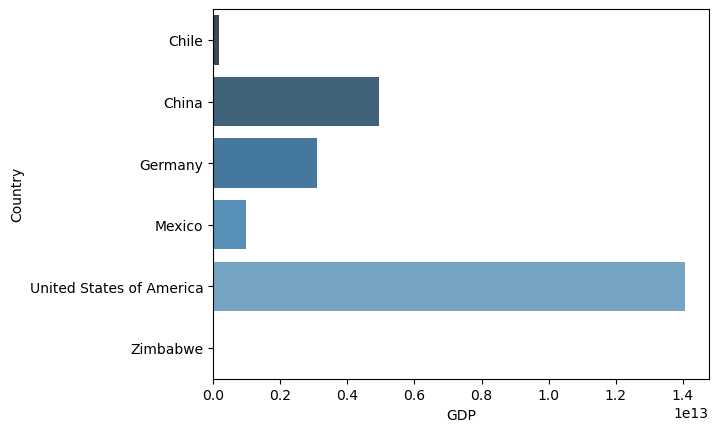

In [7]:
sns.barplot(x='GDP', y='Country', data=dfMeans, palette='Blues_d')

In the above barplot we can that the US has the highest GDP, followed by China and Germany. We might start to question the correlation between GDP and life expectancy, since the US has the highest GDP, but it's life expectancy is not the highest, and chile has the second lowest GDP but it's life expectancy is higher than the US. The correlation that we saw in the scatterplot shows us that whenever there's an increase in GDP, there's also an increase in life expectancy, but it doesn't show us that the higher the GDP, the higher the life expectancy. So higher GDP doesn't necessarily mean higher life expectancy.

## Gdp improvements over time

In [11]:
GDPCountryYear = health_data.groupby(['Country', 'Year']).mean().reset_index()

GDPCountryYear


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


Text(0, 0.5, 'GDP in Trillions of US Dollars')

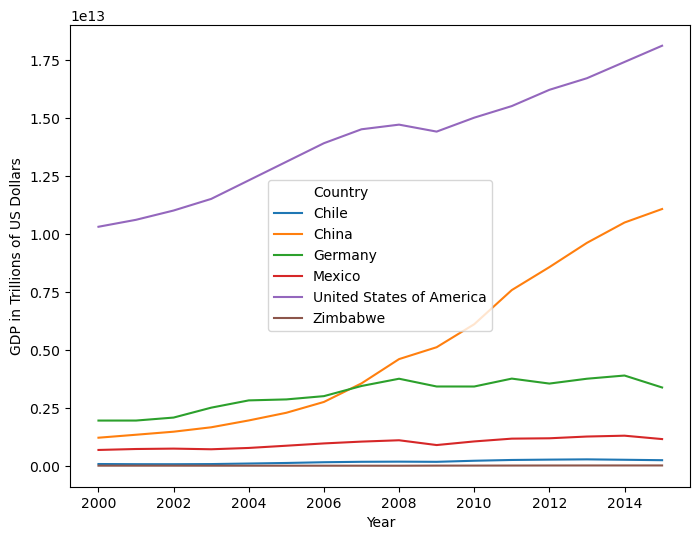

In [31]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='GDP', hue='Country', data=GDPCountryYear)
plt.ylabel('GDP in Trillions of US Dollars')

We want to explore the GDP over time using a lineplot, but plotting it this way might actually not be the best method. Because the plot is dominated by an "outlier" which is the US. The United State's GDP is so much higher than for example chile or zimbabwe, that it's hard to see the other countries. So we will plot 6 different countries, to see if we can see any interesting trends.

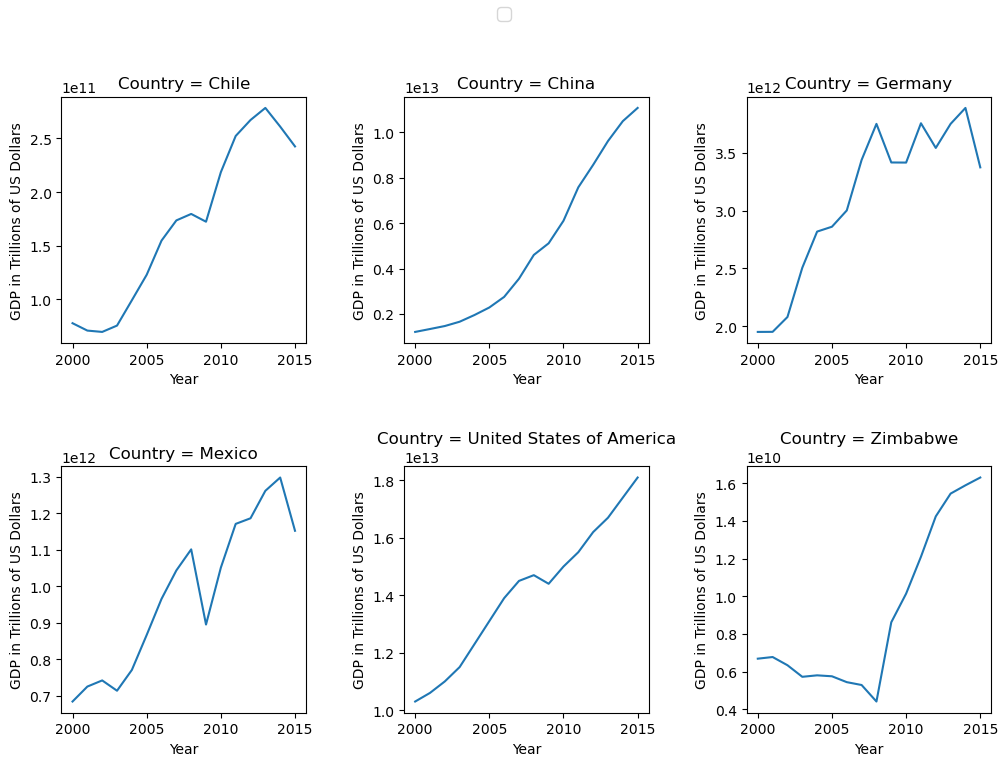

In [36]:
fig, (ax1, ax2) = plt.subplots(2,3)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
fig.set_size_inches(12, 8)

def create_lineplot(country, ax):
    df = GDPCountryYear[GDPCountryYear.Country == country]
    sns.lineplot(x='Year', y='GDP', data=df, ax=ax)
    ax.set_ylabel('GDP in Trillions of US Dollars')
    ax.set_title('Country = ' + country)
    
fig.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'], loc='upper center', ncol=3, fontsize=12)
create_lineplot('Chile', ax1[0])
create_lineplot('China', ax1[1])
create_lineplot('Germany', ax1[2])
create_lineplot('Mexico', ax2[0])
create_lineplot('United States of America', ax2[1])
create_lineplot('Zimbabwe', ax2[2])



See, this is a lot better. Here we can actually see that Zimbabwe has actually had a huge increase in GDP, and that a lot of the countries have had a steady increase in GDP. We can also see that the US has had a steady increase in GDP. In this plot we can also see that a 3rd world country like Zimbabwe has had a bigger increase in GDP than a developed country like Germany. In the next section we can compare gdp improvements to life expectancy improvements.

### Life expectancy improvements over time

In [38]:
LEABYear = health_data.groupby(['Country', 'Year']).mean().reset_index()
LEABYear

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


<AxesSubplot: xlabel='Year', ylabel='Life expectancy at birth (years)'>

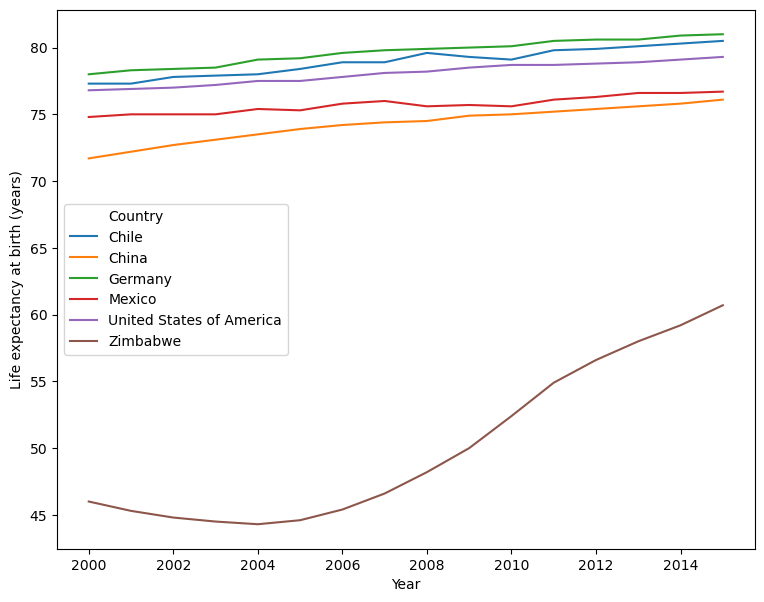

In [43]:
plt.figure(figsize=(9,7))
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=LEABYear)